In [276]:
import pandas as pd 
import json
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

In [16]:
def streaming_data() -> pd.DataFrame:
    df = pd.read_json("../data/StreamingHistory0.json").append(pd.read_json("../data/StreamingHistory1.json"))
    df['endTime'] = pd.to_datetime(df['endTime'])
    df = df[df.endTime >= pd.to_datetime("01-01-2021")]
    return df
    
df = streaming_data()
df

,endTime,artistName,trackName,msPlayed
268,2021-01-01 03:08:00,Chris King,Evil Kunevil (feat. Trippie Redd),14762
269,2021-01-01 03:16:00,Playboi Carti,Over,426
270,2021-01-01 03:47:00,100 gecs,stupid horse (Remix) [feat. GFOTY & Count Baldor],41122
271,2021-01-01 03:49:00,100 gecs,hand crushed by a mallet (Remix) [feat. Fall O...,103886
272,2021-01-01 03:50:00,Little Big,Hypnodancer,57446
...,...,...,...,...
2164,2021-12-17 18:33:00,Taylor Swift,closure,180653
2165,2021-12-17 20:38:00,Cortex,123: 2022 Yearly Themes,6814770
2166,2021-12-17 20:39:00,Cortex,88: Cortex Airport,82503
2167,2021-12-17 20:53:00,DJ Vibe Inc. & Max Barbaria,Intro,6176


In [49]:
total_minutes = int(df.msPlayed.sum()/1000/60)
print(f"Minutes listened this year {total_minutes}.")

Minutes listened this year 50342.


In [75]:
df["time_interval"] = df.endTime.dt.floor('d')
time_played_by_day = df.groupby("time_interval").sum().reset_index().sort_values(by="msPlayed",ascending=False)
time_played_by_day["minutes_played"] = (time_played_by_day.msPlayed/1000/60).astype('int')
print(time_played_by_day[:10])
print(time_played_by_day[-10:])

df["month"] = df.endTime.dt.month
time_played_by_month = df.groupby("month").sum()
time_played_by_month["minutes_played"] = (time_played_by_month.msPlayed/1000/60).astype('int')
print(time_played_by_month)

    time_interval  msPlayed  month  minutes_played
231    2021-09-04  27040403   1467             450
127    2021-05-14  25360435    420             422
234    2021-09-07  24877418    882             414
151    2021-06-09  24486549    474             408
162    2021-06-21  23756675    132             395
138    2021-05-26  23665417     30             394
158    2021-06-16  23360380    102             389
139    2021-05-27  23127674    145             385
233    2021-09-06  23047581    864             384
156    2021-06-14  22861478    714             381
    time_interval  msPlayed  month  minutes_played
168    2021-06-29    401145     24               6
117    2021-05-03    322114     20               5
105    2021-04-19    203492      4               3
111    2021-04-25    134100      8               2
192    2021-07-24     95779      7               1
272    2021-10-17     60431     20               1
169    2021-07-01     59541      7               0
246    2021-09-19     40213    

In [41]:
#Analyzing top artists 
top_artists = df.groupby("artistName").sum().sort_values(by='msPlayed', ascending=False).reset_index()
podcasts = ["Dimension 20", "Ologies with Alie Ward", "The Yard", "Dear Hank & John", "You Can Sit With Us", 
            "The TryPod", "Cortex", "Erin is the Funny One", "The Gus & Eddy Podcast", 'A Conversation With...', 
            "The Numberphile Podcast"]

top_ten = top_artists[~top_artists.artistName.isin(podcasts)][:10]
top_ten["minutes_played"] = (top_ten.msPlayed/1000/60).astype('int')
top_ten.reset_index(drop=True)

,artistName,msPlayed,minutes_played
0,Taylor Swift,150763870,2512
1,Glass Animals,57189292,953
2,Sophie Cates,46803183,780
3,Phoebe Bridgers,43768698,729
4,The Avalanches,36698721,611
5,Sweet Trip,35942550,599
6,Lolo Zouaï,34286299,571
7,Hotel Fiction,33859613,564
8,Stop Light Observations,33496834,558
9,Flipturn,32440084,540


In [46]:
top_podcasts = top_artists[top_artists.artistName.isin(podcasts)].reset_index(drop=True)
top_podcasts["minutes_played"] = (top_podcasts.msPlayed/1000/60).astype('int')
top_podcasts

,artistName,msPlayed,minutes_played
0,Dimension 20,162656644,2710
1,Ologies with Alie Ward,135433288,2257
2,The Yard,128379527,2139
3,Dear Hank & John,107487441,1791
4,You Can Sit With Us,106709118,1778
5,The TryPod,91836688,1530
6,Cortex,80039472,1333
7,Erin is the Funny One,62564868,1042
8,The Gus & Eddy Podcast,59491721,991
9,A Conversation With...,41488954,691


In [109]:
podcasts = ["Dimension 20", "Ologies with Alie Ward", "The Yard", "Dear Hank & John", "You Can Sit With Us", 
            "The TryPod", "Cortex", "Erin is the Funny One", "The Gus & Eddy Podcast", 'A Conversation With...', 
            "The Numberphile Podcast", "The Joe Rogan Experience", "Lex Fridman Podcast", "Good For You"]

songs = df[~df.artistName.isin(podcasts)]
top_songs = songs.groupby("trackName").agg({"endTime":"count", 
                                            "msPlayed": "sum"}).sort_values(by='msPlayed', ascending=False).reset_index()


top_songs = top_songs.rename(columns = {"endTime": "timesPlayed"})
top_songs["minutes_played"] = (top_songs.msPlayed/1000/60).astype('int')
top_songs

print("Top Songs by Times Played")
print(top_songs.sort_values(by='timesPlayed', ascending=False)[:10].reset_index(drop=True))

print("Top Songs by Minutes Played")
print(top_songs[:10])


Top Songs by Times Played
        trackName  timesPlayed  msPlayed  minutes_played
0  drinking games           63  10283139             171
1   football game           60   8378666             139
2        Bad Kids           58   9423078             157
3          hangar           53   7234932             120
4      Devil Town           52   7980801             133
5      Daydrifter           50   5697010              94
6           Kyoto           50   7042691             117
7          Leaves           50   7180670             119
8            seer           49   6545391             109
9      Soft Focus           48   7184391             119
Top Songs by Minutes Played
                                           trackName  timesPlayed  msPlayed  \
0                                            Chicago           45  10455235   
1                                     drinking games           63  10283139   
2                                             August           46   9695342   
3  

In [123]:
swift_songs = df[df.artistName=='Taylor Swift']\
    .groupby('trackName')\
    .agg({"endTime": "count", 
          "msPlayed": "sum"})\
    .reset_index()\
    .rename(columns = {"endTime": "count"})

swift_songs['minutesPlayed'] = (swift_songs.msPlayed/1000/60).astype('int')
swift_songs.sort_values(by="count", ascending=False)[:10].reset_index(drop=True)

,trackName,count,msPlayed,minutesPlayed
0,tolerate it,41,7702884,128
1,willow,37,7203744,120
2,evermore (feat. Bon Iver),36,9367550,156
3,cowboy like me,34,8309878,138
4,"no body, no crime (feat. HAIM)",32,5736690,95
5,dorothea,32,6537120,108
6,‘tis the damn season,31,6663811,111
7,marjorie,31,6965894,116
8,long story short,31,5541463,92
9,closure,30,5300147,88


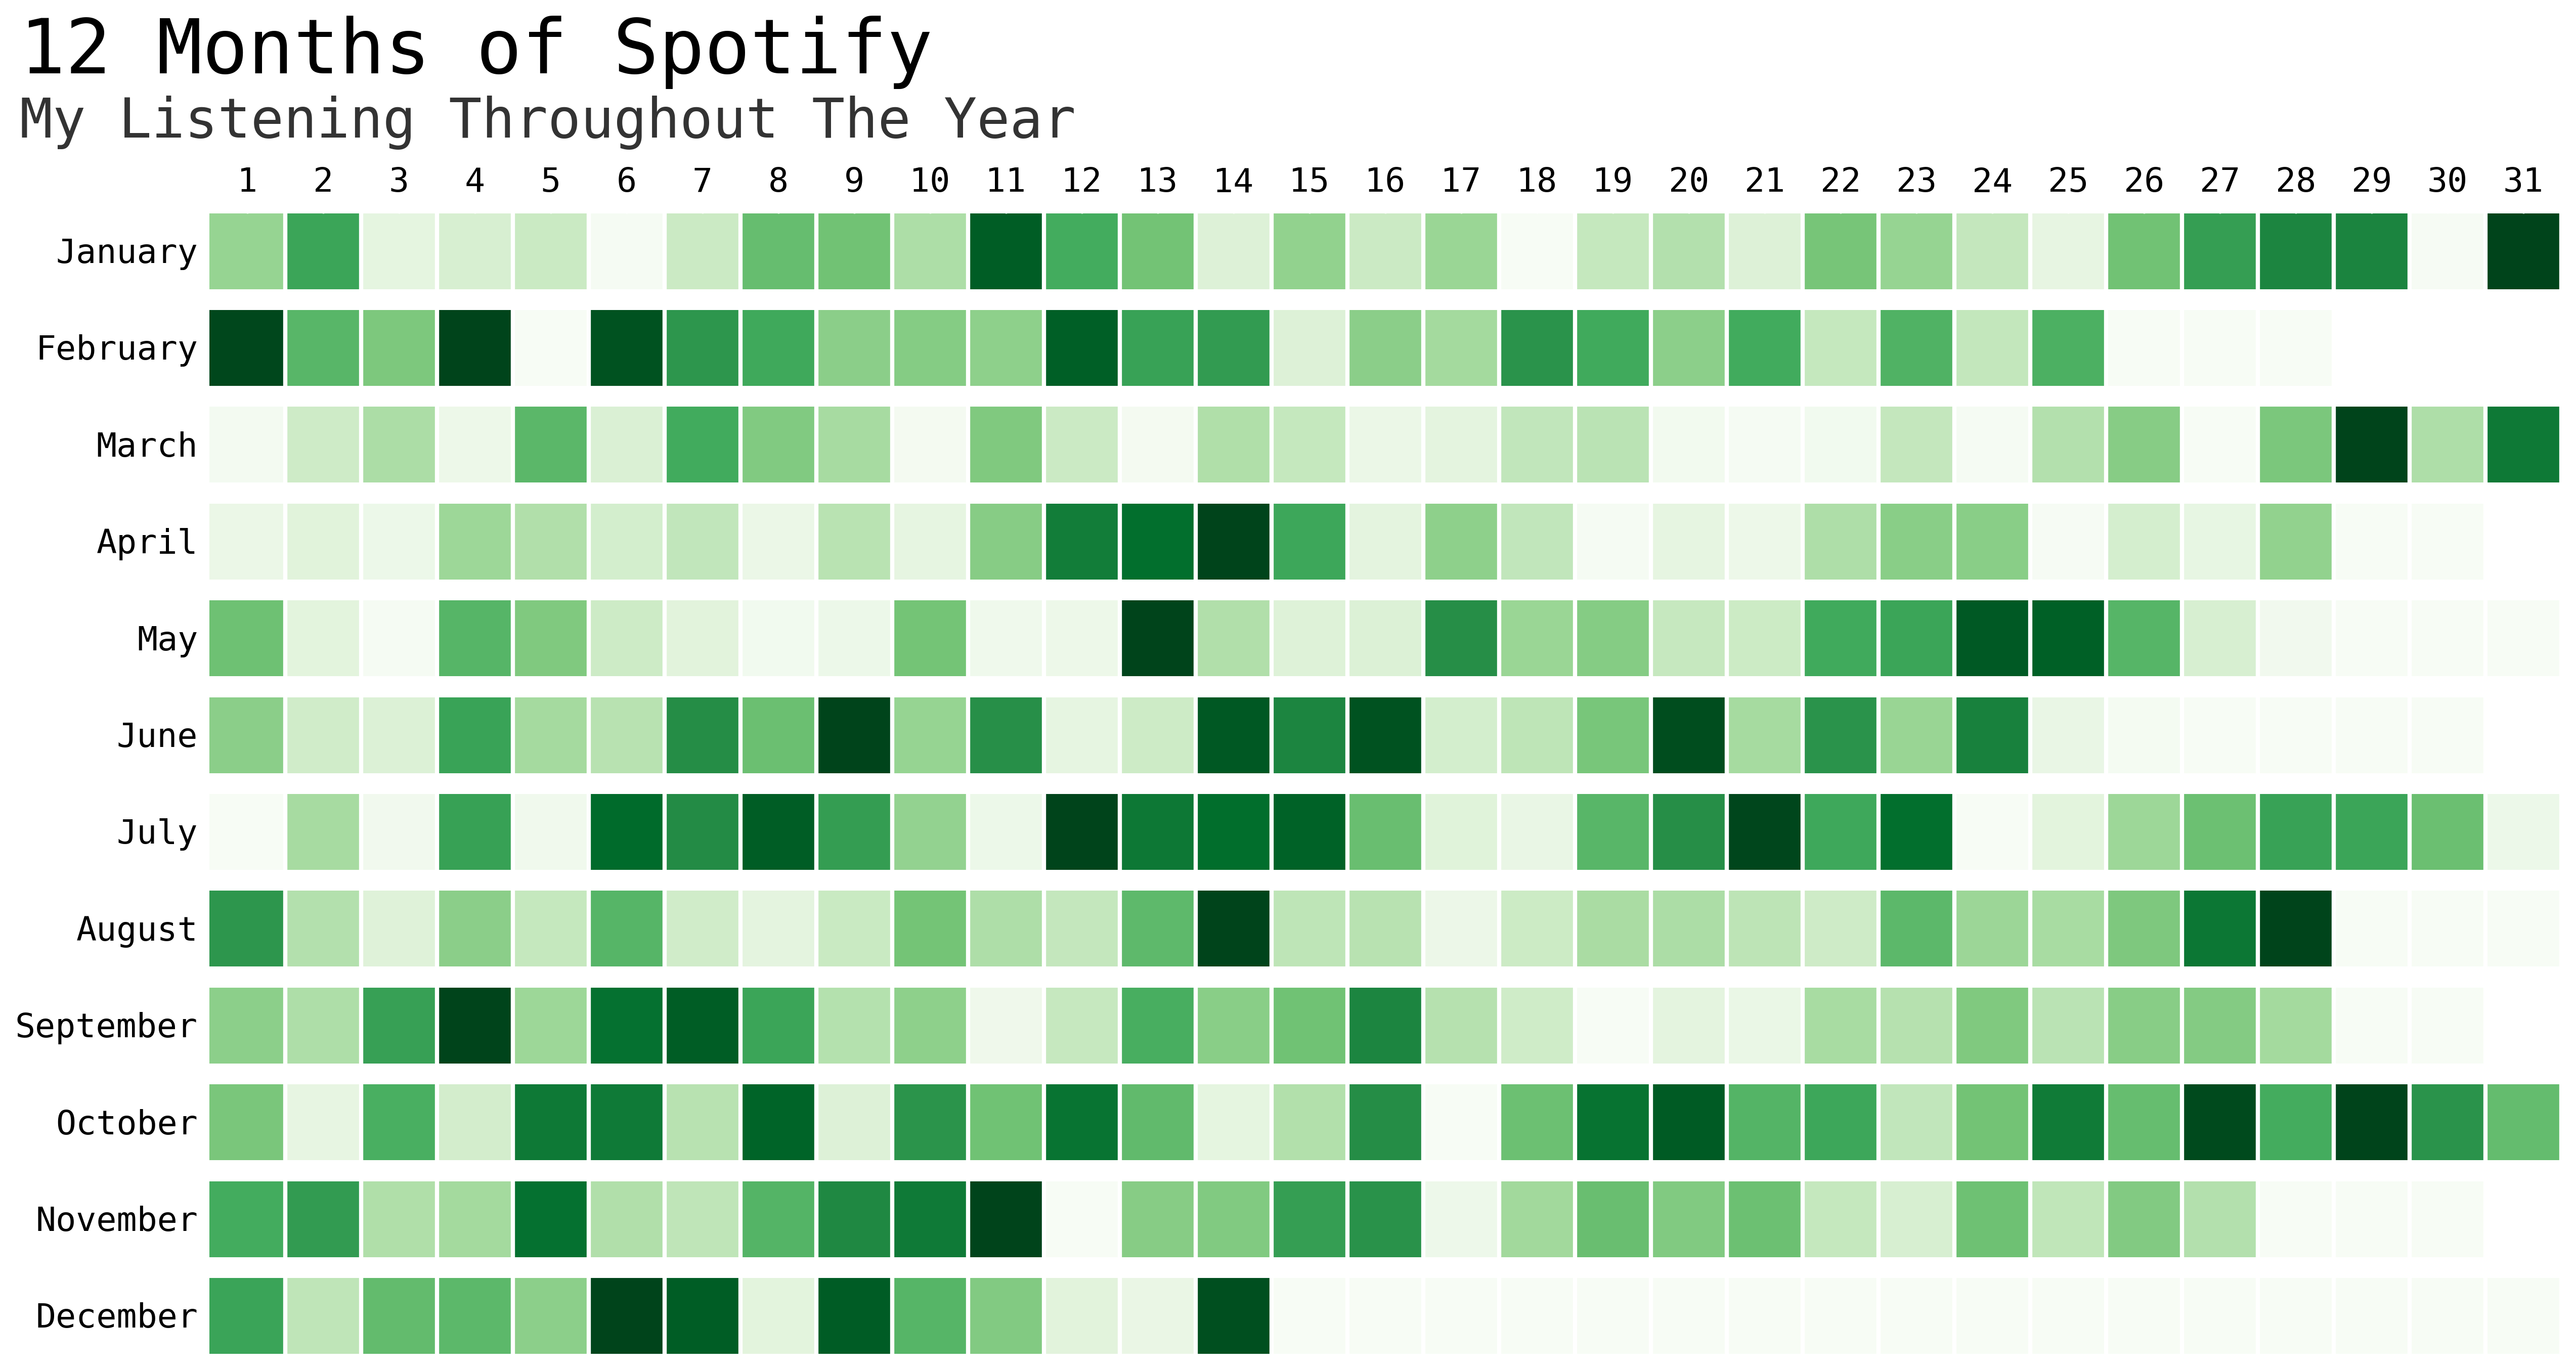

In [308]:
# Aggregate based on day of the year
time_played_by_day = df.groupby("time_interval").agg({"msPlayed": "sum", 
                                                      "month": "mean"}).reset_index()

#rescale so graph is across entire year not by month
time_played_by_day['scaled_ms'] = time_played_by_day['msPlayed']/time_played_by_day['msPlayed'].max()

#fill in missing days with 0 time listened 
missing_dates = pd.date_range(start="2021-01-01", end="2021-12-31").difference(time_played_by_day.time_interval)
missing_df = pd.DataFrame({"time_interval": missing_dates, 
               "msPlayed": [0 for _ in range(len(missing_dates))], 
               "scaled_ms": [0 for _ in range(len(missing_dates))]})
missing_df["month"] = missing_df.time_interval.dt.month 
time_played_by_day = time_played_by_day.append(missing_df).reset_index(drop=True)

#parameters for graph
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
          "October", "November", "December"]

colormap = plt.cm.Greens #because spotify
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.dpi"] = 300

#font settings 
font = FontProperties()
font.set_family("monospace")

fig, axes = plt.subplots(12, 1)

for i, ax in enumerate(axes): 
    
    month = time_played_by_day[time_played_by_day.month == i + 1]
    waffle = np.array([month.msPlayed])

    im = ax.matshow(waffle,cmap=colormap)
    if i == 0: 
        ax.set_xticks(ticks = [_ for _ in range(31)], labels = [_ for _ in range(1, 32)], 
                      fontproperties = font, fontsize=16, minor=False)
    else: 
        ax.set_xticks([])
    ax.set_xticks(ticks = [0.5 + i for i in range(31)], color = 'w', minor='True')
    ax.set_yticks([])
    ax.grid(color='w', linestyle='-', linewidth=2, which="minor")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(axis = 'both', color="white")
    ax.tick_params(axis = 'both', color="white", which='minor')
    
    ax.text(-0.65, 0.15, months[i], fontproperties = font, fontsize=16, ha="right")

axes[0].text(-3, -2.35, "12 Months of Spotify", fontproperties = font,  fontsize=36)
axes[0].text(-3, -1.5, "My Listening Throughout The Year", fontproperties = font, fontsize=26, alpha = 0.8)

plt.autoscale()
plt.savefig("../plots/yearly_listening_plot/base_yearly_listening_plot.png", bbox_inches = 'tight')

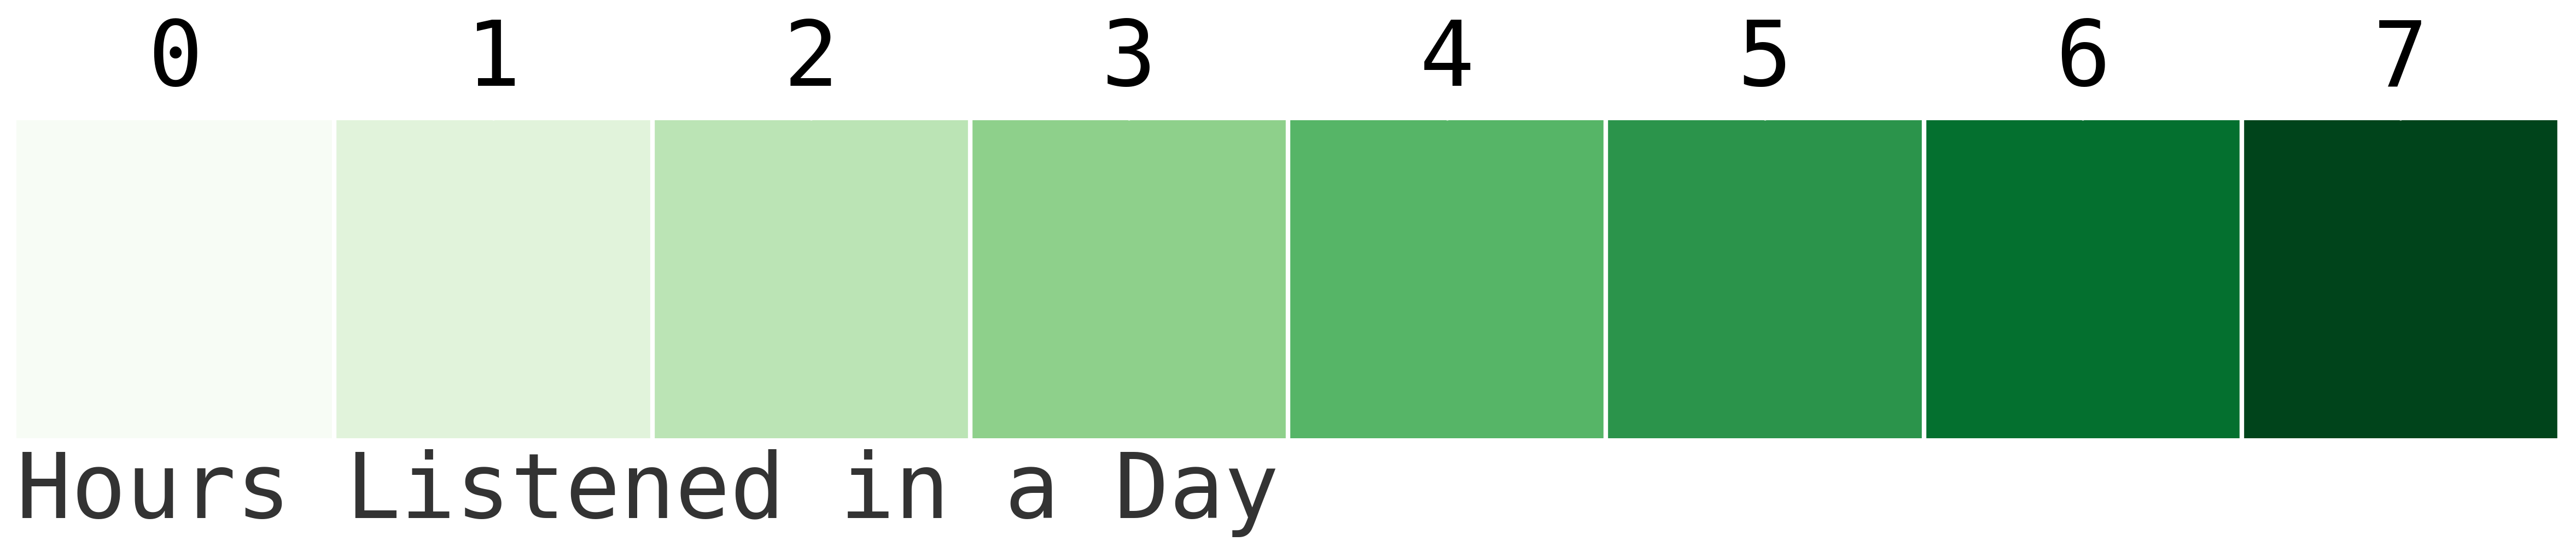

In [310]:

colormap = plt.cm.Greens #because spotify
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.dpi"] = 300

fig, ax = plt.subplots()
array = np.array([np.arange(1,9)])
ax.matshow(array, cmap = colormap)

ax.set_xticks(ticks = [0.5 + i for i in range(8)], color = 'w', minor='True')
ax.set_yticks([])
ax.grid(color='w', linestyle='-', linewidth=2, which="minor")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis = 'both', color="white")
ax.tick_params(axis = 'both', color="white", which='minor')

ax.set_xticks(ticks = [_ for _ in range(8)], labels = [_ for _ in range(8)], 
                      fontproperties = font, fontsize=40, minor=False)

ax.text(-0.5, 0.75, "Hours Listened in a Day", fontproperties = font, fontsize=40, alpha = 0.8)

plt.savefig("../plots/yearly_listening_plot/legend.png")